In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets from the local

In [2]:
# restaurants_limited_features
df_res = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/data/restaurants_limited_features.csv")

# restaurant ids dataset
res_ids = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/data/restaurants.csv")

# yelp general business dataset
business_json_path = "/Users/dima/code/Dimasaur/scorecast/data/yelp_academic_dataset_business.json"

#reading the json file
df_business_raw = pd.read_json(business_json_path, lines=True)

# creating a destination path
csv_file_path_review = "yelp_business_raw.csv"

#converting the output into a csv file
df_business_raw.to_csv(csv_file_path_review, index=False)

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_50308/3914361222.py:2: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_res = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/data/restaurants_limited_features.csv")


In [3]:
df_res.head()

,Unnamed: 0,index,business_id,postal_code,latitude,longitude,stars,review_count,is_open,food_type,...,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,price_range,reservations,table_service,take_out,wheelchair
0,0,3,MTSW4McQd7CbVtyjqoe9mw,19107,39.955505,-75.155564,4.0,80,1,['O'],...,False,False,False,False,False,1,False,False,True,False
1,1,5,CF33F8-E6oudUQ46HnavjQ,37015,36.269593,-87.058943,2.0,6,1,['O'],...,True,True,False,True,True,1,False,False,True,True
2,2,8,k0hlBqXX-Bt0vf1op7Jr1w,63123,38.565165,-90.321087,3.0,19,0,['O'],...,True,True,False,True,True,1,False,False,True,False
3,3,9,bBDDEgkFA1Otx9Lfe7BZUQ,37207,36.208102,-86.768170,1.5,10,1,['O'],...,True,False,False,True,True,1,False,False,True,True
4,4,11,eEOYSgkmpB90uNA7lDOMRA,33602,27.955269,-82.456320,4.0,10,1,['O'],...,False,False,False,False,NaN,False,False,False,False,False


In [4]:
# replace the syntax of the food_type

df_res['food_type_string'] = df_res['food_type'].apply(lambda x: str(x).strip('[]'))
df_res['food_type_string'] = df_res['food_type_string'].apply(lambda x: str(x).replace("'",""))

In [16]:
# check the value counts of the food types
df_res.food_type_string.value_counts(normalize=True).head(20)

food_type_string
O               0.624570
Italian         0.060152
Mexican         0.035815
Chinese         0.028163
American        0.027129
Burgers         0.019400
Sandwiches      0.016932
Japanese        0.011843
Diners          0.008265
Cafes           0.007538
Delis           0.006046
                0.006046
Thai            0.005606
Barbeque        0.005453
Vietnamese      0.005204
Seafood         0.005108
Indian          0.004420
Greek           0.003616
Cajun/Creole    0.003233
Bakery          0.002908
Name: proportion, dtype: float64

In [17]:
# replace the values in the food_types with the top - 20 cuisines

replace_dictionary = {
    "Pizza" : "Italian",
    "Burgers, Fast Food" : "Burgers",
    "Italian, Pizza" : "Italian",
    "American (New)" : "American",
    "Fast Food, Sandwiches" : "Sandwiches",
    "American (Traditional)" : "American",
    "Fast Food, Mexican" : "Mexican",
    "Coffee & Tea, Food" : "Cafes",
    "Japanese, Sushi Bars" : "Japanese",
    "American (Traditional), Diners" : "Diners",
    "Bakeries, Food" : "Bakery",
    "Delis, Sandwiches" : "Delis",
    "Mexican, Tex-Mex" : "Mexican",
    "American (Traditional), Burgers" : "American",
    "Sushi Bars" : "Japanese",
    "Chinese, Fast Food" : "Chinese",
    "American (Traditional), Cafes" : "American",
    "Mexican, Tacos" : "Mexican",
    "Pizza, Sandwiches" : "Sandwiches",
    "Food, Pizza" : "Italian",
    "American (Traditional), Seafood" : "American",
    "Greek, Mediterranean" : "Greek",
    "American (New), American (Traditional)" : "American",
    "Cajun/Creole, Seafood" : "Cajun/Creole"

}

df_res.food_type_string = df_res.food_type_string.replace(replace_dictionary)

# generate the clea array of the top 20 categories
df_food_t20 = list(df_res.food_type_string.value_counts(normalize=True).head(25).index)
df_food_t20.remove('O')
df_food_t20.remove('')
df_food_t20 = df_food_t20[:20]

# top 20 food types
np_food_20 = np.array([df_food_t20])


In [18]:
# filtering the the list of business to get the restaurants only
df_restaurants = df_business_raw[df_business_raw.business_id.isin(res_ids.business_id)].reset_index(drop=True)

# sanity check on the shapes after the transformations of the datasets
print(df_restaurants.shape,df_business_raw.shape, res_ids.shape)

(52268, 14) (150346, 14) (52268, 2)


In [19]:
df_restaurants['food_type_one'] = None

# function that extracts a category from a column in a dataframe if that category is present in a given list
def extract_category(categories, food_types):
    for food in categories.split():
        if food in food_types:
            return food
    return None

df_restaurants['food_type_one'] = df_restaurants['categories'].apply(lambda x: extract_category(x, df_food_t20))

In [20]:
df_restaurants.categories_clean = df_restaurants.categories.str.replace(", ",",")

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_50308/2457883086.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_restaurants.categories_clean = df_restaurants.categories.str.replace(", ",",")


In [21]:
df_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,food_type_one
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",None
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",None
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,American
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",None
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",None


In [22]:
df_restaurants.food_type_one.value_counts(normalize=True).head(20)

food_type_one
American        0.549378
Sandwiches      0.065134
Mexican         0.064036
Italian         0.049312
Chinese         0.049312
Burgers         0.041709
Seafood         0.034545
Delis           0.022546
Japanese        0.021843
Cafes           0.019162
Barbeque        0.014635
Thai            0.013009
Vietnamese      0.012218
Indian          0.011251
Diners          0.009669
Steakhouses     0.008702
Cajun/Creole    0.007032
Greek           0.006505
Name: proportion, dtype: float64

In [23]:

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df_restaurants[['food_type_one']])

df_restaurants[ohe.get_feature_names_out()] = ohe.transform(df_restaurants[['food_type_one']])

df_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,food_type_one_Indian,food_type_one_Italian,food_type_one_Japanese,food_type_one_Mexican,food_type_one_Sandwiches,food_type_one_Seafood,food_type_one_Steakhouses,food_type_one_Thai,food_type_one_Vietnamese,food_type_one_None
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
ohe_columns = ['food_type_one_American', 'food_type_one_Barbeque',
       'food_type_one_Burgers', 'food_type_one_Cafes',
       'food_type_one_Cajun/Creole', 'food_type_one_Chinese',
       'food_type_one_Delis', 'food_type_one_Diners', 'food_type_one_Greek',
       'food_type_one_Indian', 'food_type_one_Italian',
       'food_type_one_Japanese', 'food_type_one_Mexican',
       'food_type_one_Sandwiches', 'food_type_one_Seafood',
       'food_type_one_Steakhouses', 'food_type_one_Thai',
       'food_type_one_Vietnamese', 'food_type_one_None']
ohe_sum = df_restaurants[ohe_columns].sum()
print(ohe_sum)

food_type_one_American        12500.0
food_type_one_Barbeque          333.0
food_type_one_Burgers           949.0
food_type_one_Cafes             436.0
food_type_one_Cajun/Creole      160.0
food_type_one_Chinese          1122.0
food_type_one_Delis             513.0
food_type_one_Diners            220.0
food_type_one_Greek             148.0
food_type_one_Indian            256.0
food_type_one_Italian          1122.0
food_type_one_Japanese          497.0
food_type_one_Mexican          1457.0
food_type_one_Sandwiches       1482.0
food_type_one_Seafood           786.0
food_type_one_Steakhouses       198.0
food_type_one_Thai              296.0
food_type_one_Vietnamese        278.0
food_type_one_None            29515.0
dtype: float64


Text(0.5, 1.0, 'Distribution of ratings for Italian places')

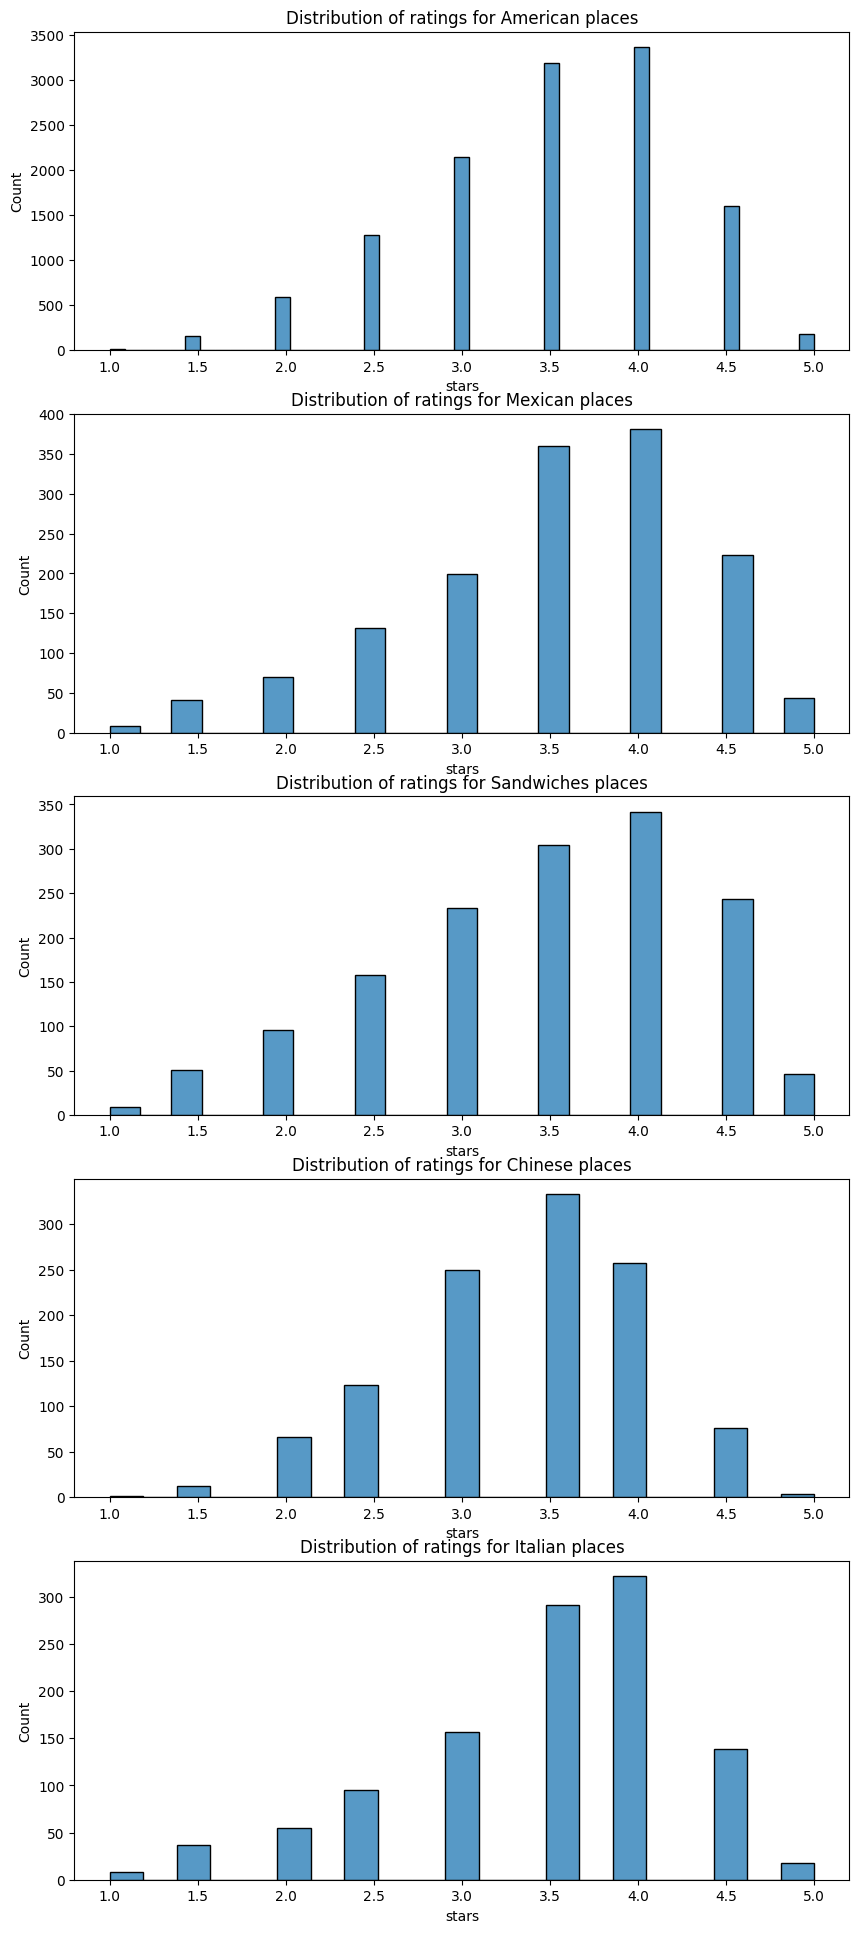

In [43]:
# check the distribution of reviews for each food category

reviews_food_type_one_American = df_restaurants[df_restaurants.food_type_one_American == 1]
reviews_food_type_one_Mexican = df_restaurants[df_restaurants.food_type_one_Mexican == 1]
reviews_food_type_one_Sandwiches = df_restaurants[df_restaurants.food_type_one_Sandwiches == 1]
reviews_food_type_one_Chinese = df_restaurants[df_restaurants.food_type_one_Chinese == 1]
reviews_food_type_one_Italian = df_restaurants[df_restaurants.food_type_one_Italian == 1]
reviews_food_type_one_None = df_restaurants[df_restaurants.food_type_one_None == 1]





fig, ax = plt.subplots(5,1,figsize=(10,24))

sns.histplot(reviews_food_type_one_American.stars, ax=ax[0])
ax[0].set_title('Distribution of ratings for American places')
sns.histplot(reviews_food_type_one_Mexican.stars, ax=ax[1])
ax[1].set_title('Distribution of ratings for Mexican places')
sns.histplot(reviews_food_type_one_Sandwiches.stars, ax=ax[2])
ax[2].set_title('Distribution of ratings for Sandwiches places')
sns.histplot(reviews_food_type_one_Chinese.stars, ax=ax[3])
ax[3].set_title('Distribution of ratings for Chinese places')
sns.histplot(reviews_food_type_one_Italian.stars, ax=ax[4])
ax[4].set_title('Distribution of ratings for Italian places')


In [45]:
print(reviews_food_type_one_American.stars.median())
print(reviews_food_type_one_Mexican.stars.median())
print(reviews_food_type_one_Sandwiches.stars.median())
print(reviews_food_type_one_Chinese.stars.median())
print(reviews_food_type_one_Italian.stars.median())
print(reviews_food_type_one_None.stars.median())

3.5
3.5
3.5
3.5
3.5
3.5


In [46]:
print(reviews_food_type_one_American.stars.mean())
print(reviews_food_type_one_Mexican.stars.mean())
print(reviews_food_type_one_Sandwiches.stars.mean())
print(reviews_food_type_one_Chinese.stars.mean())
print(reviews_food_type_one_Italian.stars.mean())
print(reviews_food_type_one_None.stars.mean())

3.49608
3.5271105010295125
3.4595141700404857
3.354723707664884
3.479500891265597
3.5271048619346095
